# This dataset is from Kaggle

https://www.kaggle.com/divyansh22/flight-delay-prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data exploratory analysis

In [2]:
df = pd.read_csv('Jan_2019_ontime.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

In [4]:
#drop column 21 because it have no useful infomation
df.drop('Unnamed: 21',axis=1,inplace=True)

In [5]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0


In [6]:
#check duplicate in these two columns
df.duplicated(subset=['OP_UNIQUE_CARRIER','OP_CARRIER'], keep=False).unique()

#two columns are duplicate, drop 1 of them
df.drop('OP_CARRIER',axis=1,inplace=True)

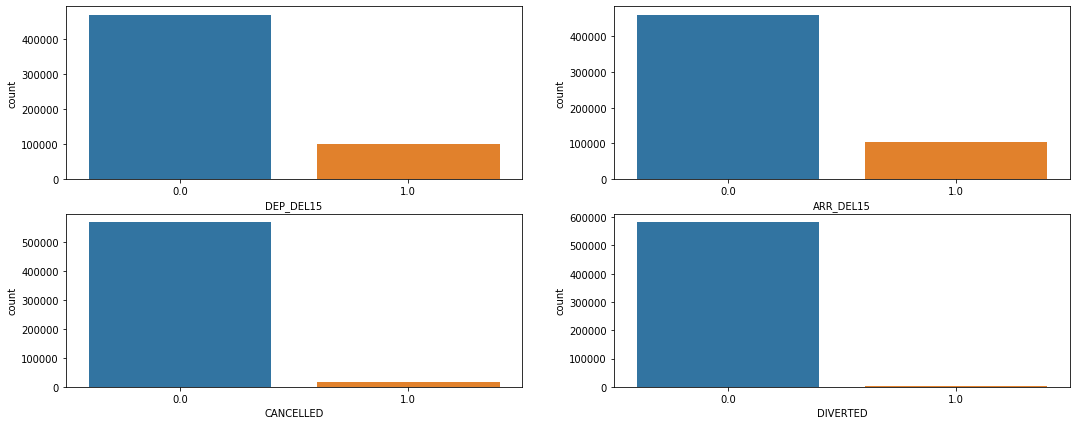

In [7]:
#count the time planes were delayed 15 minutes in term of departure and arrival and the time planes were cancelled and diverted
fig, ax = plt.subplots(2,2,figsize=(18,7))
sns.countplot(x='DEP_DEL15',ax=ax[0][0],data=df)
sns.countplot(x='ARR_DEL15',ax=ax[0][1],data=df)
sns.countplot(x='CANCELLED',ax=ax[1][0],data=df)
sns.countplot(x='DIVERTED',ax=ax[1][1],data=df)

In [9]:
#calculate the percentage of delay, cancelled and diverted
print(df['DEP_DEL15'].value_counts()/len(df['DEP_DEL15'])*100)
print('---'*10)
print(df['ARR_DEL15'].value_counts()/len(df['ARR_DEL15'])*100)
print('---'*10)
print(df['CANCELLED'].value_counts()/len(df['CANCELLED'])*100)
print('---'*10)
print(df['DIVERTED'].value_counts()/len(df['DIVERTED'])*100)

0.0    80.259424
1.0    16.939990
Name: DEP_DEL15, dtype: float64
------------------------------
0.0    78.896033
1.0    18.017929
Name: ARR_DEL15, dtype: float64
------------------------------
0.0    97.135885
1.0     2.864115
Name: CANCELLED, dtype: float64
------------------------------
0.0    99.778076
1.0     0.221924
Name: DIVERTED, dtype: float64


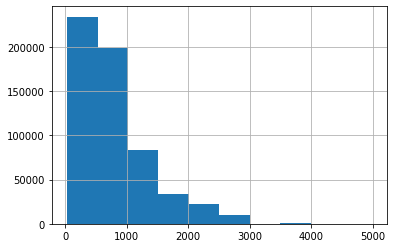

In [10]:
#histogram of distances
df['DISTANCE'].hist()

In [11]:
df['DISTANCE'].describe()

count    583985.000000
mean        797.742767
std         589.999261
min          31.000000
25%         363.000000
50%         640.000000
75%        1037.000000
max        4983.000000
Name: DISTANCE, dtype: float64

Text(0.5, 1.0, 'Rank by no. of delay flights')

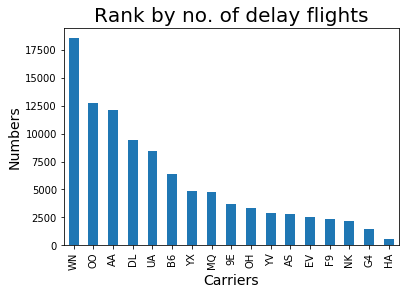

In [12]:
#Rank by number of times planes were delayed in term of departure
carrier=df[df['DEP_DEL15']==1]['OP_UNIQUE_CARRIER'].value_counts()

nga= carrier.plot(kind='bar')
nga.set_xlabel('Carriers',size=14)
nga.set_ylabel('Numbers',size=14)
nga.set_title('Rank by no. of delay flights',size=20)

#plt.savefig('nga.png')

Text(0, 0.5, 'Number')

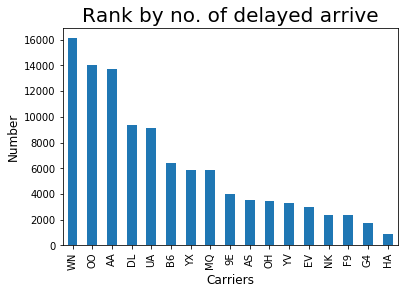

In [13]:
#Rank by number of times planes were delayed in term of arrival
carrier1=df[df['ARR_DEL15']==1]['OP_UNIQUE_CARRIER'].value_counts()

ngo = carrier1.plot(kind='bar')
ngo.set_title('Rank by no. of delayed arrive',size=20)
ngo.set_xlabel('Carriers',size=12)
ngo.set_ylabel('Number',size=12)

Text(0, 0.5, 'Number')

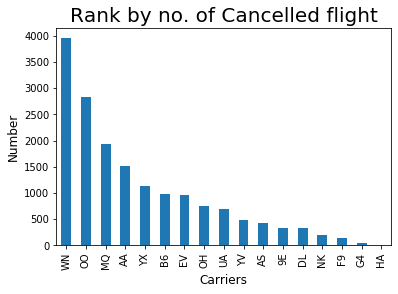

In [14]:
#Rank by number of times planes were cancelled
carrier2=df[df['CANCELLED']==1]['OP_UNIQUE_CARRIER'].value_counts()

ngo = carrier2.plot(kind='bar')
ngo.set_title('Rank by no. of Cancelled flight',size=20)
ngo.set_xlabel('Carriers',size=12)
ngo.set_ylabel('Number',size=12)

Text(0, 0.5, 'Number')

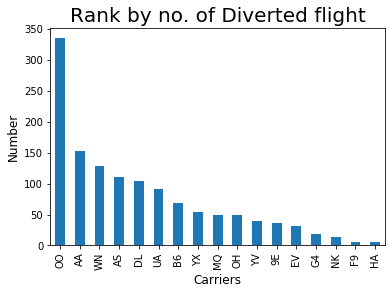

In [15]:
#Rank by number of times planes were diverted
carrier3=df[df['DIVERTED']==1]['OP_UNIQUE_CARRIER'].value_counts()
ngo = carrier3.plot(kind='bar')
ngo.set_title('Rank by no. of Diverted flight',size=20)
ngo.set_xlabel('Carriers',size=12)
ngo.set_ylabel('Number',size=12)

Text(0, 0.5, 'Count')

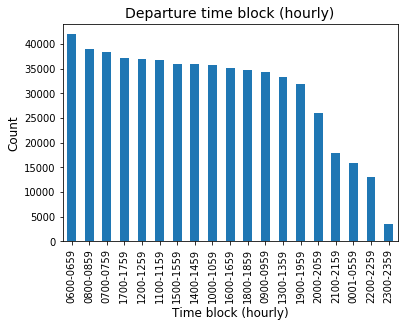

In [16]:
#plot the departure time block
dia= df['DEP_TIME_BLK'].value_counts().plot(kind='bar')
dia.set_title('Departure time block (hourly)',size=14)
dia.set_xlabel('Time block (hourly)',size=12)
dia.set_ylabel('Count',size=12)
